In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import cartopy.io.shapereader as shpreader
import metpy
import matplotlib.gridspec as gridspec
from metpy.plots import SkewT
from metpy.plots import Hodograph
from metpy.calc import lcl
from metpy.calc import dewpoint_from_relative_humidity, lfc
from metpy.units import units
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import metpy.calc as mpcalc
import sklearn
import math
from sklearn.metrics import jaccard_score

In [30]:
lt_data = xr.open_dataset('./dados/loutubro2022.nc', engine="netcdf4")

In [32]:
lt_data.time[:]



<xarray.DataArray 'time' (time: 48)>
array(['2022-10-19T00:00:00.000000000', '2022-10-19T01:00:00.000000000',
       '2022-10-19T02:00:00.000000000', '2022-10-19T03:00:00.000000000',
       '2022-10-19T04:00:00.000000000', '2022-10-19T05:00:00.000000000',
       '2022-10-19T06:00:00.000000000', '2022-10-19T07:00:00.000000000',
       '2022-10-19T08:00:00.000000000', '2022-10-19T09:00:00.000000000',
       '2022-10-19T10:00:00.000000000', '2022-10-19T11:00:00.000000000',
       '2022-10-19T12:00:00.000000000', '2022-10-19T13:00:00.000000000',
       '2022-10-19T14:00:00.000000000', '2022-10-19T15:00:00.000000000',
       '2022-10-19T16:00:00.000000000', '2022-10-19T17:00:00.000000000',
       '2022-10-19T18:00:00.000000000', '2022-10-19T19:00:00.000000000',
       '2022-10-19T20:00:00.000000000', '2022-10-19T21:00:00.000000000',
       '2022-10-19T22:00:00.000000000', '2022-10-19T23:00:00.000000000',
       '2022-10-23T00:00:00.000000000', '2022-10-23T01:00:00.000000000',
       '2022-10-23T02:00:00.000000000', '2022-10-23T03:00:00.000000000',
       '2022-10-23T04:00:00.000000000', '2022-10-23T05:00:00.000000000',
       '2022-10-23T06:00:00.000000000', '2022-10-23T07:00:00.000000000',
       '2022-10-23T08:00:00.000000000', '2022-10-23T09:00:00.000000000',
       '2022-10-23T10:00:00.000000000', '2022-10-23T11:00:00.000000000',
       '2022-10-23T12:00:00.000000000', '2022-10-23T13:00:00.000000000',
       '2022-10-23T14:00:00.000000000', '2022-10-23T15:00:00.000000000',
       '2022-10-23T16:00:00.000000000', '2022-10-23T17:00:00.000000000',
       '2022-10-23T18:00:00.000000000', '2022-10-23T19:00:00.000000000',
       '2022-10-23T20:00:00.000000000', '2022-10-23T21:00:00.000000000',
       '2022-10-23T22:00:00.000000000', '2022-10-23T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2022-10-19 ... 2022-10-23T23:00:00
Attributes:
    long_name:  time

In [33]:
n = 24+18
local = "Timbó"
mucape = []
pw = []
lift = []
k = []
lcl = []
lcf = []
tvvt = []
tempo = []
lon = 17
lat = 9
d = n-6
while d <= n+4:
    t = (lt_data.t[d,:,la,lo].values-273.15)
    r = (lt_data.r[d,:,la,lo].values)
    td = t - ((100 - r)/5) 
    p = lt_data.level.values 
    u = (lt_data.u[d,:,la,lo].values*1.944)
    v = (lt_data.v[d,:,la,lo].values*1.944)
    tempo.append(lt_data.time[d].dt.strftime('%H:%M').values)
    
    r = list(reversed(r)) *units.percent
    p = list(reversed(p)) * units.hPa
    t = list(reversed(t)) * units.degC
    td = list(reversed(td)) * units.degC
    u = list(reversed(u)) * units.knots
    v = list(reversed(v)) * units.knots 
    
    prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')
    
    tvvt.append((((t[0].magnitude - t[6].magnitude)/1.5)+((t[6].magnitude - t[20].magnitude) /9.2))/2)
    mucape.append(mpcalc.most_unstable_cape_cin(p, t, td))
    pw.append(mpcalc.precipitable_water(p, td)) 
    lift.append(mpcalc.lifted_index(p, t, prof))
    d = d+1
    

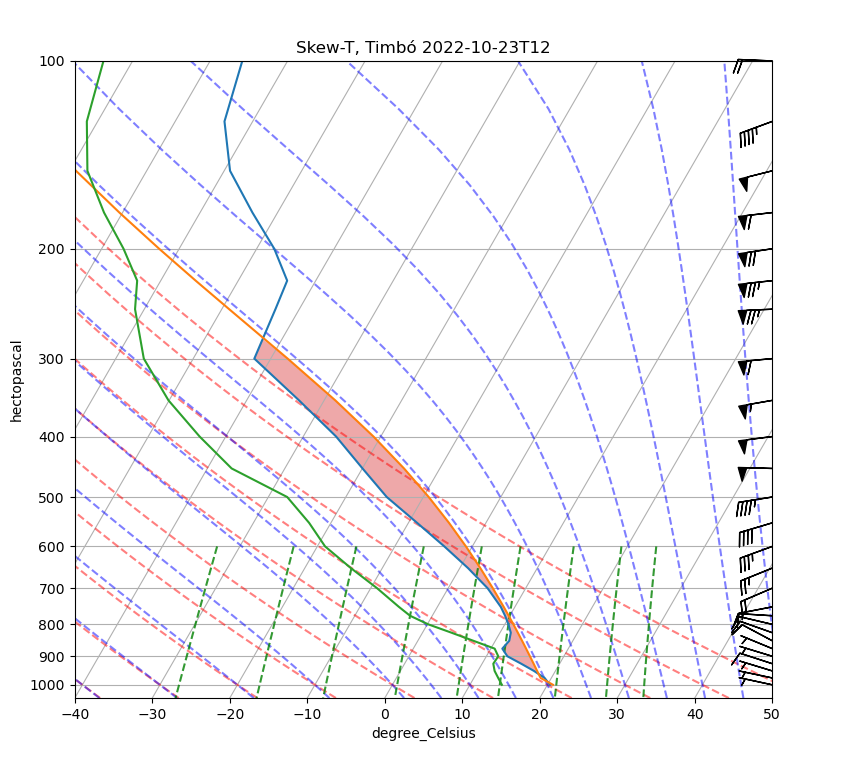

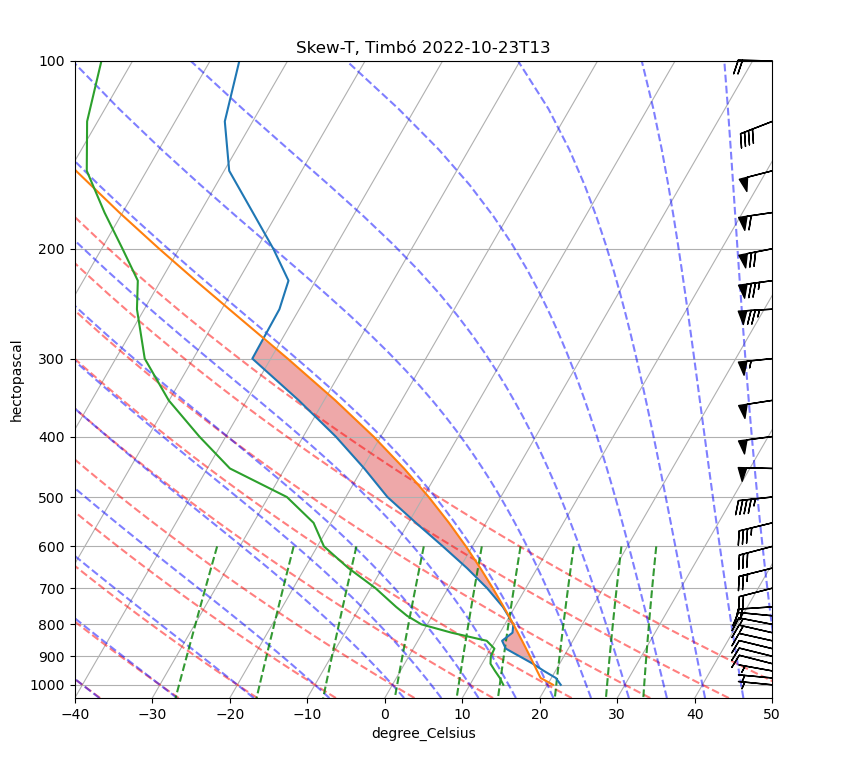

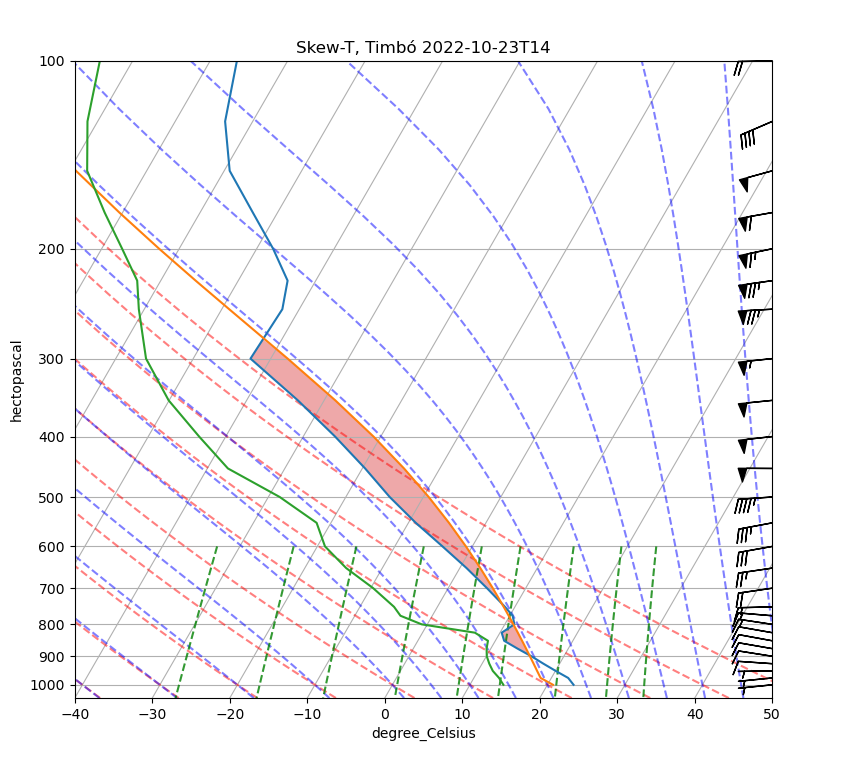

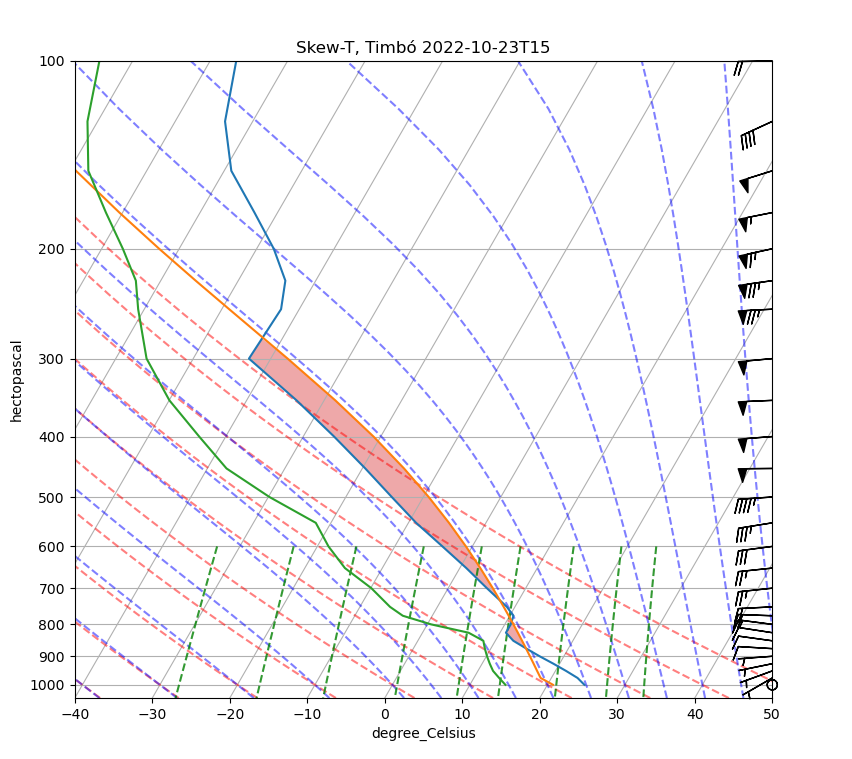

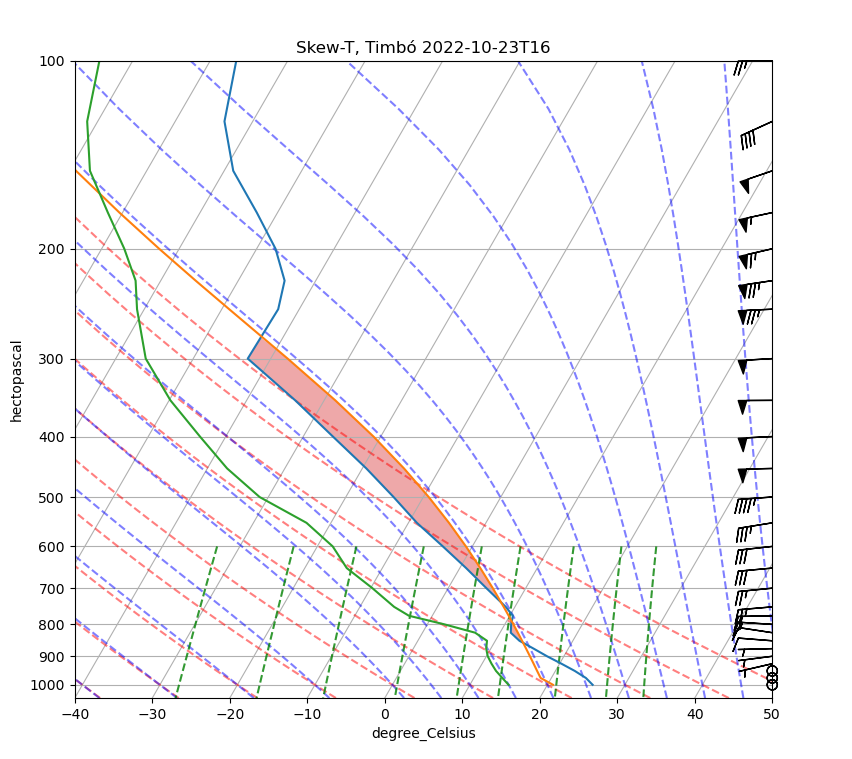

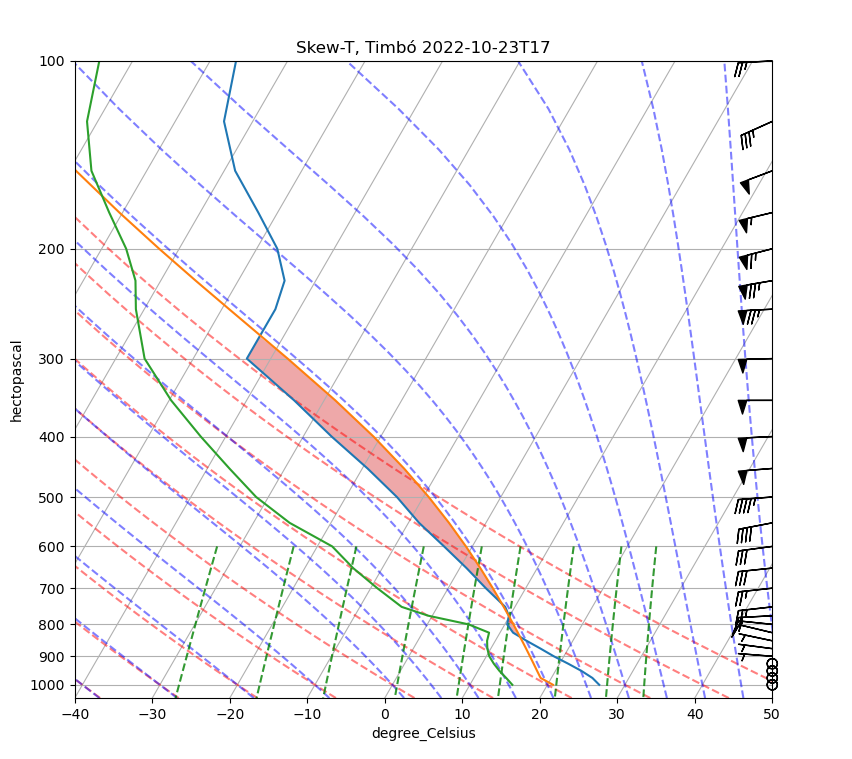

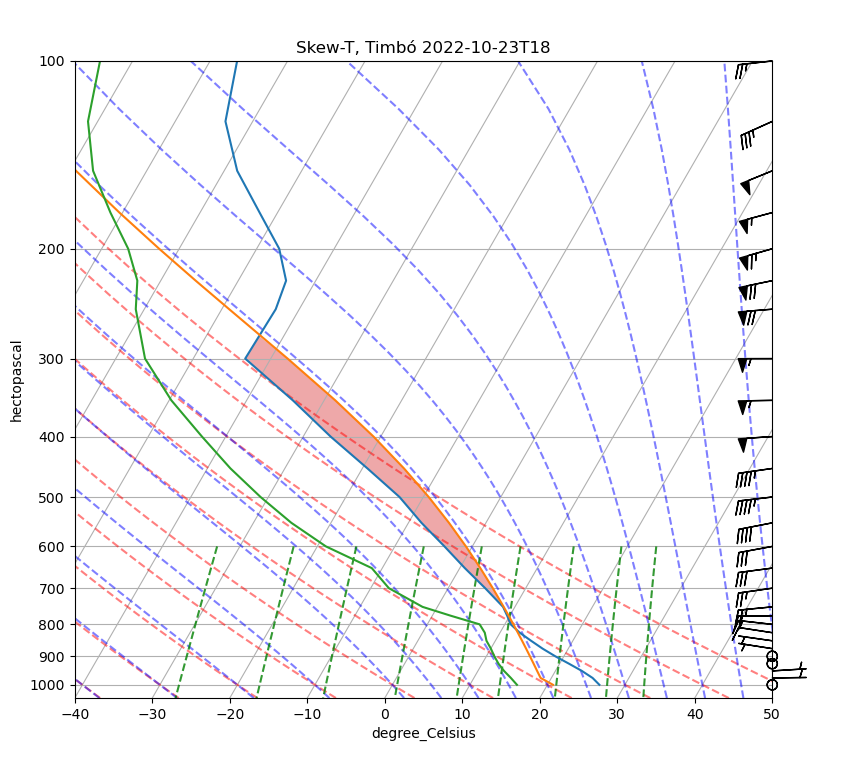

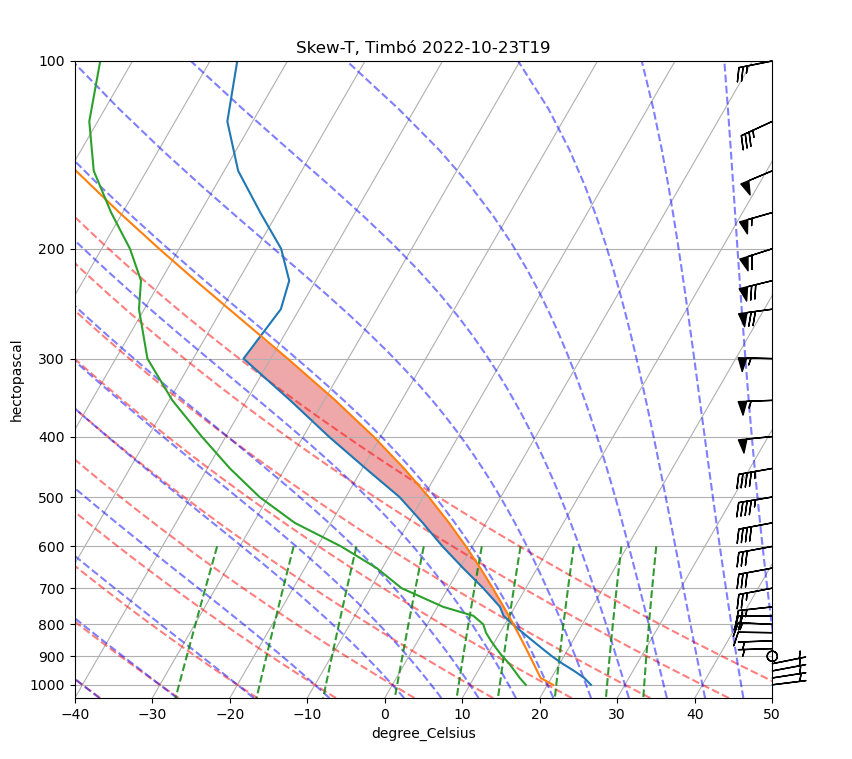

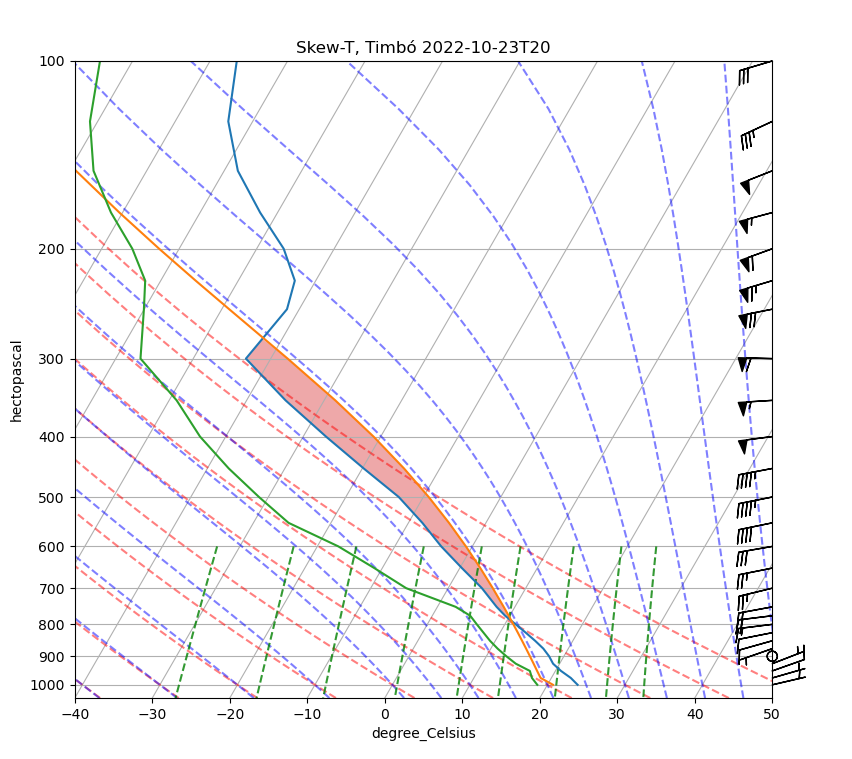

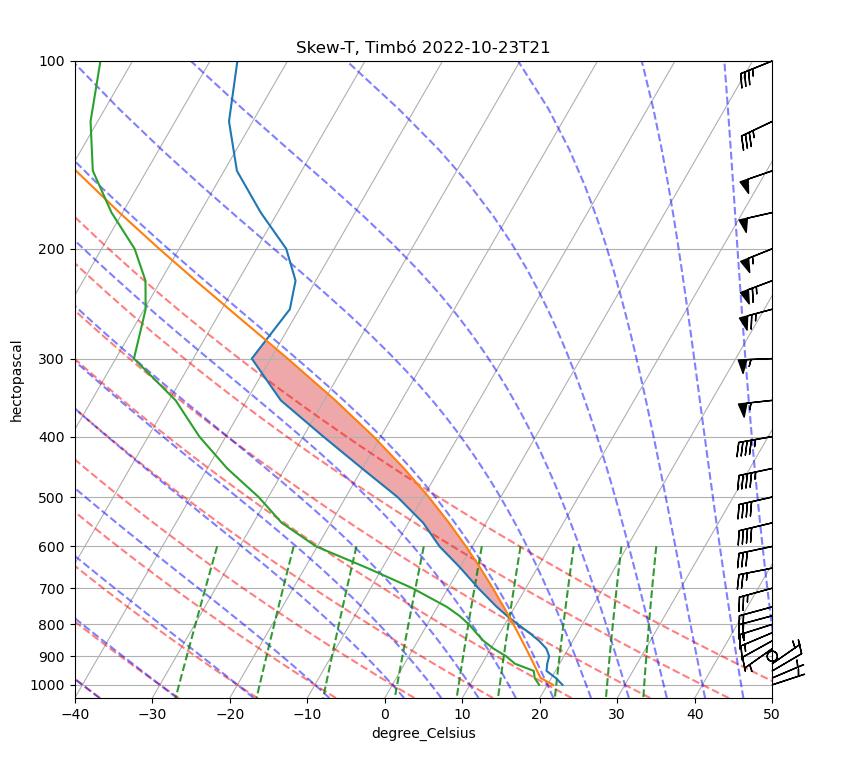

In [34]:
d = n-6
while d < n+4:
    hora = lt_data.time[d].values
    hora = str(hora)
    hora = hora[0:13]
    fig = plt.figure(figsize=(9, 9))
    skew = SkewT(fig)

    plt.title(f"Skew-T, {local} {hora}")
    #td = dewpoint_from_relative_humidity(t * units.degC, r* units.percent)
    #prof = parcel_profile(p, t[-1], td[-1]).to('degC')
    #prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')



    t = (lt_data.t[d,:,lat,lon].values-273.15)
    r = (lt_data.r[d,:,lat,lon].values)
    td = t - ((100 - r)/5) 
    p = lt_data.level.values 
    u = (lt_data.u[d,:,lat,lon].values*1.944)
    v = (lt_data.v[d,:,lat,lon].values*1.944)

    r = list(reversed(r)) *units.percent
    p = list(reversed(p)) * units.hPa
    t = list(reversed(t)) * units.degC
    td = list(reversed(td)) * units.degC
    u = list(reversed(u)) * units.knots
    v = list(reversed(v)) * units.knots 

    skew.plot(p, t)
    skew.plot(p, prof)
    skew.plot(p, td)


    skew.plot_barbs(p, u, v, flip_barb=True)
    skew.shade_cape(p, t ,prof)


    #skew.shade_cin(p,t,td)
    skew.plot_dry_adiabats()
    skew.plot_moist_adiabats()
    skew.plot_mixing_lines()


   # fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\skewt{d}.png', bbox_inches='tight')
    d = d+1
    


In [35]:
c=0
for i in tempo:
    tempo[c] = tempo[c].tolist()
    c = c+1
c=0 
lift2= []
for i in lift:
    lift2.append(lift[c][0].magnitude)
    c=c+1
c=0
d=0
mucape2= []
for i in mucape:
    d = 0
    while d<= 1: 
        if d/2 == 0:
            mucape2.append(mucape[c][d].magnitude)
            d=d+1
        else:
            d=d+1
    c = c+1


        

In [29]:
################1º a ser rodada
mu=  mucape2
local1 = local
data1 = data


In [48]:
##################2º
mu2 = mucape2
local2 = local
data2 = data

NameError: name 'data' is not defined

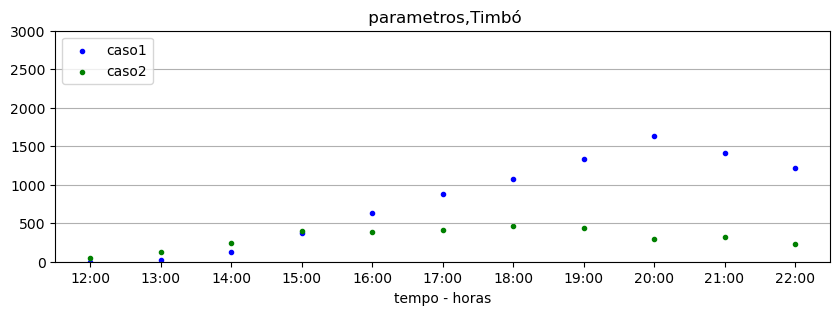

In [47]:
fig = plt.figure(figsize=(10,3))
plt.scatter(tempo,mu2, marker='.',color="b" ,label = "caso1")
plt.scatter(tempo,mu, marker='.',color="g" , label= 'caso2')
plt.ylim(top=3000, bottom=0)
plt.title(f" parametros,")
plt.xlabel('tempo - horas')
plt.legend(loc='upper left')
plt.grid(axis = 'y')
plt.show()   

In [41]:
fig = plt.figure(figsize=(10,3))
plt.bar(tempo,pw, width = 0.5,color="c" ,align= 'center')
plt.ylim(top=220, bottom=0)
plt.title(f" Água preciptável,{local}")
plt.ylabel('milimetros - mm ')
plt.xlabel('tempo - horas')
plt.show()
fig.savefig(f'C:\\Users\\victo\\Desktop\\teste\\awa2.png', bbox_inches='tight')

[48.0780238306021 <Unit('millimeter')>,
 55.94037343655605 <Unit('millimeter')>,
 74.60137400120027 <Unit('millimeter')>,
 63.709339293296125 <Unit('millimeter')>,
 48.12490408167291 <Unit('millimeter')>,
 44.67755139231736 <Unit('millimeter')>,
 43.62493159739191 <Unit('millimeter')>,
 45.75125811998654 <Unit('millimeter')>,
 48.19840524216585 <Unit('millimeter')>,
 49.62091186560194 <Unit('millimeter')>,
 48.4356572899674 <Unit('millimeter')>]